In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\emper\OneDrive\Desktop\Customer Acquisition Cost Analysis\cac.csv")

df.head()


,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers
0,CUST0001,Email Marketing,3489.027844,16
1,CUST0002,Online Ads,1107.865808,33
2,CUST0003,Social Media,2576.081025,44
3,CUST0004,Online Ads,3257.567932,32
4,CUST0005,Email Marketing,1108.408185,13


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [3]:
# Creating a new column for Customer Acquisition Cost (CAC)
df['CAC'] = df['Marketing_Spend']/ df['New_Customers']
# Creating a new column for Conversion Rate
df['Conversion_Rate'] = df['New_Customers'] / df['Marketing_Spend'] * 100

df.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,CAC,Conversion_Rate
0,CUST0001,Email Marketing,3489.027844,16,218.064240,0.458580
1,CUST0002,Online Ads,1107.865808,33,33.571691,2.978700
2,CUST0003,Social Media,2576.081025,44,58.547296,1.708021
3,CUST0004,Online Ads,3257.567932,32,101.798998,0.982328
4,CUST0005,Email Marketing,1108.408185,13,85.262168,1.172853


### **Break-Even Customers:**

-   Now, We'll calculate the break-even customers for our marketing campaign.

-   What Is Break-Even Customer?
    -   The break-even customers is refer to how many customers do we need to acquire using a specific marketing channel to cover our marketing spend.

In [18]:
df['break_even'] = df['Marketing_Spend'] / df['CAC']

In [19]:
df_break_even = df.groupby('Marketing_Channel')['break_even'].mean().reset_index()
df_break_even = df_break_even.sort_values(by='break_even', ascending=False)

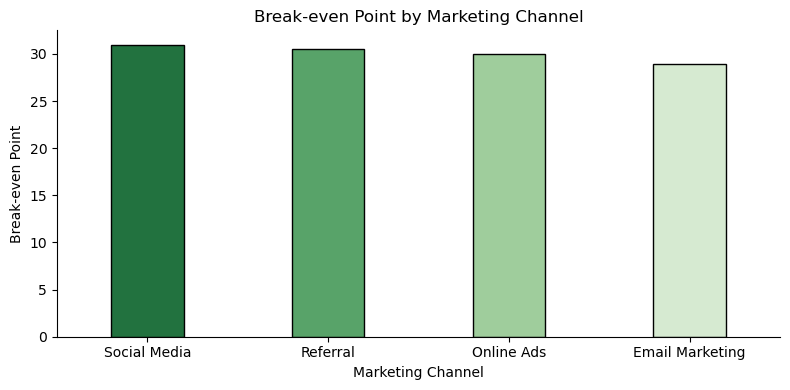

In [20]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_break_even,
    x='Marketing_Channel',
    y='break_even',
    palette='Greens_r',
    edgecolor='black',
    width=0.4,
    ci=None
)

plt.title('Break-even Point by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Break-even Point')
#plt.xticks(rotation=45)


sns.despine()
plt.tight_layout()
plt.show()

- **Social Media** has the highest break-even point at approximately **30 months**, indicating it takes the longest time to recover marketing costs.
- **Referral** follows closely with a break-even point of around **30 months**, showing similar recovery timelines.
- **Online Ads** also has a break-even point of about **30 months**, aligning with Social Media and Referral in terms of recovery duration.
- **Email Marketing** has the lowest break-even point, at roughly **29 months**, making it the fastest channel to reach profitability.

#### Key Observations:
1. **Similar Performance**: Social Media, Referral, and Online Ads have nearly identical break-even points, suggesting comparable efficiency in recovering marketing costs over time.
2. **Faster Recovery**: Email Marketing stands out as the most efficient channel, requiring fewer months to break even compared to other channels.
3. **Consistency Across Channels**: The relatively close break-even points across all channels indicate that none of them are significantly underperforming in terms of long-term cost recovery.
____________

In [21]:
# Grouping by Marketing Channel to calculate actual and break-even customers
channel_comparison = df.groupby('Marketing_Channel', as_index=False).agg(
    Actual_Customers=('New_Customers', 'sum'),
    Break_Even_Customers=('break_even', 'sum')
)
# Melting the DataFrame for plotting
comparison_melted = channel_comparison.melt(
    id_vars='Marketing_Channel',
    value_vars=['Actual_Customers', 'Break_Even_Customers'],
    var_name='Metric',
    value_name='Customers'
)

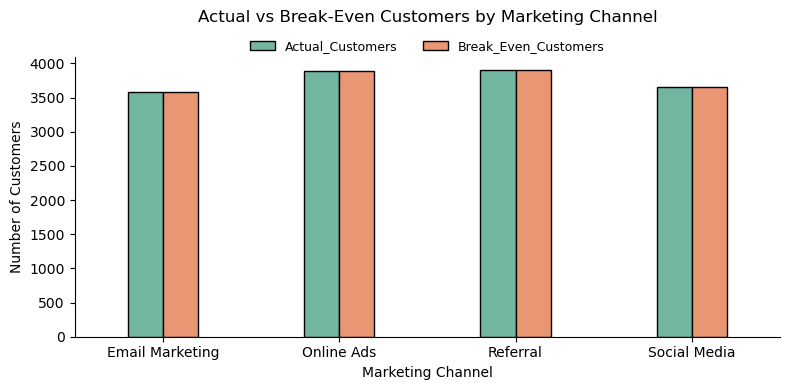

In [22]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=comparison_melted,
    x='Marketing_Channel',
    y='Customers',
    hue='Metric',
    palette='Set2',
    edgecolor='black',
    width=0.4,
)

plt.title('Actual vs Break-Even Customers by Marketing Channel', pad=25)
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Customers')

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=2,
    frameon=False,
    fontsize=9
)

sns.despine()
plt.tight_layout()
plt.show()

- **Online Ads** and **Referral** both have nearly identical performance:
  - Both channels acquired approximately **3,900 actual customers**, which is very close to their respective break-even points.
  - This indicates that these channels are performing efficiently, as they are acquiring customers at or slightly above their break-even thresholds.

- **Email Marketing**:
  - Acquired around **3,500 actual customers**, which is slightly below its break-even point of about **3,600 customers**.
  - This suggests that Email Marketing is marginally underperforming in terms of meeting its break-even target.

- **Social Media**:
  - Also acquired around **3,500 actual customers**, which is slightly below its break-even point of approximately **3,600 customers**.
  - Similar to Email Marketing, Social Media is not quite reaching its break-even threshold, indicating a slight inefficiency.

### Key Observations:
1. **Efficient Channels**: Online Ads and Referral are the most efficient channels, as they consistently meet or exceed their break-even points.
2. **Underperforming Channels**: Email Marketing and Social Media fall slightly short of their break-even targets, suggesting potential areas for optimization.
3. **Consistency Across Channels**: All channels show relatively close alignment between actual customers and break-even customers, indicating consistent performance overall.

____________________________

### **Conclusion:**
Based on the analysis of the Customer Acquisition Cost (CAC), marketing spend, and customer acquisition performance across four marketing channels — **Email Marketing**, **Online Ads**, **Social Media**, and **Referral** — the **Referral** channel emerges as the most cost-effective, consistently delivering the lowest CAC and showing strong efficiency in acquiring customers. **Online Ads** performs well in terms of conversion rate and scalability, making it a strong contender for budget allocation. **Email Marketing** has the highest average CAC and slightly underperforms relative to its break-even point, indicating a need for optimization in targeting or messaging. **Social Media** shows moderate efficiency, with room for improvement through better audience segmentation or content strategy.